In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;
sns.set()


#Lectura del archivo original
eventsData = pd.read_csv(r"C:\Users\brian\OneDrive - fi.uba.ar\Escritorio\Facultad\Datos\Trabajo-Practico-1\dataset\train.csv",low_memory = False)

In [25]:
#Informaacion basica del dataFrame
eventsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [26]:
eventsData.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


Analisis de la distribucion del largo de los tweets verdaderos

In [29]:
#Creo una columna con la cantidad de palabras
eventsData['cantidadDePalabras'] = eventsData['text'].apply(lambda x: len(x.split()))

In [30]:
#Filtro por aquellos con target =1
eventsDataTarget1 = eventsData[eventsData['target'] ==1]

In [31]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

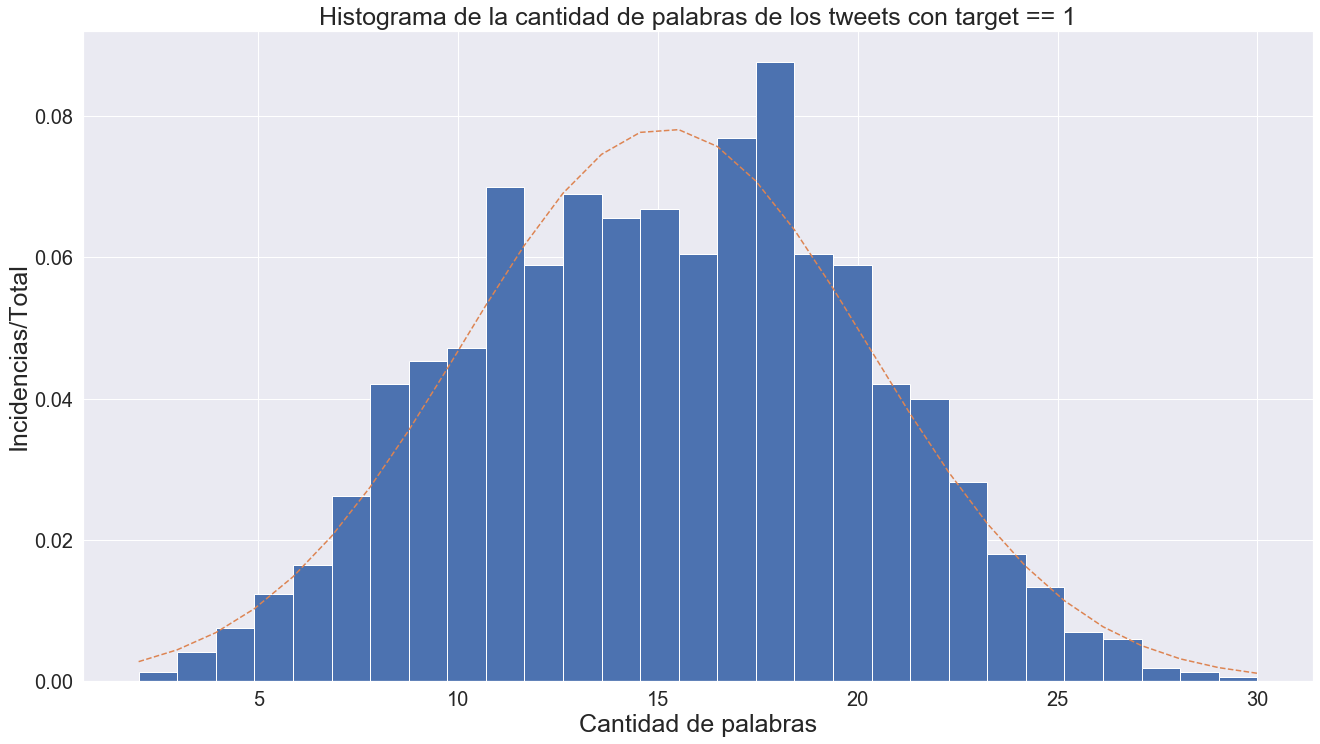

In [32]:
#Creacion del grafico en cuestion
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'],
                           num_bins,
                           density=1)

#Linea de tendencia
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) * np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins,
        y,
        '--')

ax.set_xlabel('Cantidad de palabras',size = 25)
ax.set_ylabel('Incidencias/Total',size =25)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 1',size =25)

fig.tight_layout()
plt.savefig('Histograma.png')
plt.show()

Ahora, se repetira el proceso, pero con aquellos con target == 0.

In [33]:
#Filtro por aquellos con target =0
eventsDataTarget0 = eventsData[eventsData['target'] ==0]

In [34]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

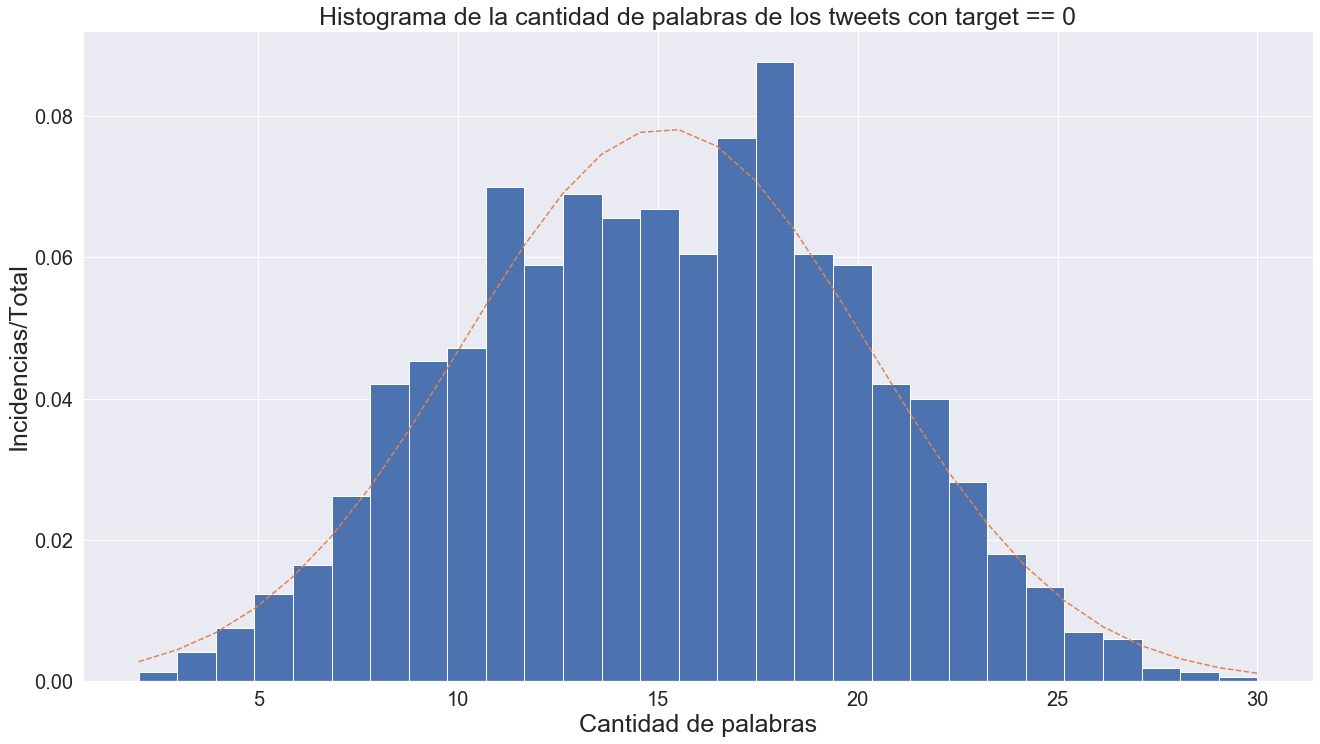

In [35]:
#Creacion del grafico en cuestion
fig, ax = plt.subplots()
fig.set_size_inches(18.5,
                    10.5)
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'],
                           num_bins,
                           density=1)
#Linea de tendencia
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) *np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins,
        y,
        '--')
ax.set_xlabel('Cantidad de palabras',size = 25)
ax.set_ylabel('Incidencias/Total',size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 0',size = 25)

fig.tight_layout()
plt.show()

Ahora vamos a trabajar contando tambien la cantidad de caracteres

In [36]:
#Primero agrego la columna en cuestion con la que voy a trabajar
eventsData['cantidadDeCaracteres'] = eventsData['text'].apply(lambda x: len(x)-x.count(" "))


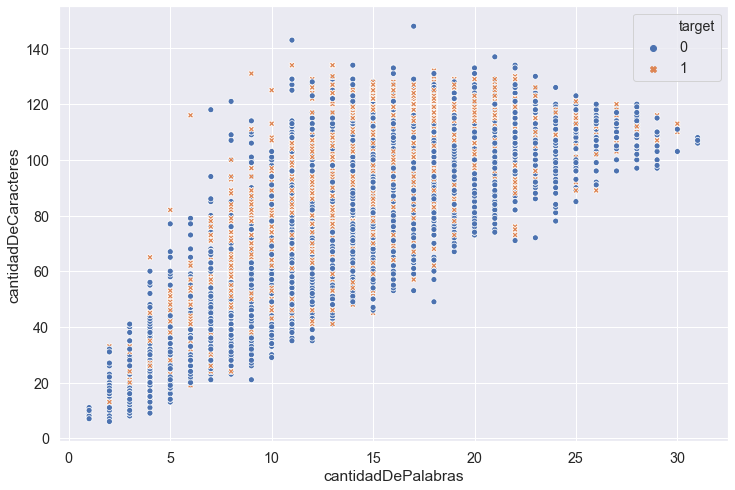

In [37]:
#Para el primer grafico, me voy a quedar simplemente con las tres columnas que me interesan
eventsDataAux = eventsData[['cantidadDeCaracteres','cantidadDePalabras','target']]
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.set(font_scale=1.3) 
ax = sns.scatterplot(x="cantidadDePalabras", y="cantidadDeCaracteres",hue ='target',style ='target', data=eventsDataAux)

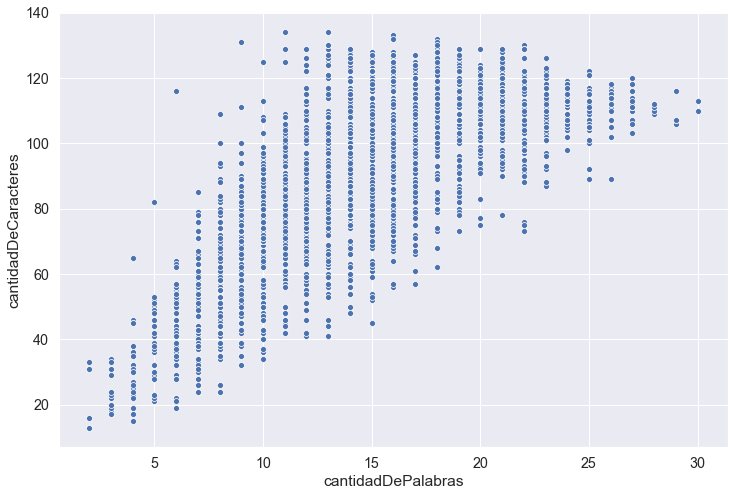

In [38]:
#En este analisis voy a ver si hay correlacion entre cantidad de palabras, y el largo de las mismas
#Voy a empezar con los target = 1
eventsDataTarget1 = eventsDataAux[eventsDataAux['target']==1]
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = sns.scatterplot(x="cantidadDePalabras", y="cantidadDeCaracteres", data=eventsDataTarget1)

In [39]:
eventsDataTarget1 = eventsDataTarget1.groupby("cantidadDePalabras").agg({'cantidadDeCaracteres':'mean'})
eventsDataTarget1 = eventsDataTarget1.reset_index()

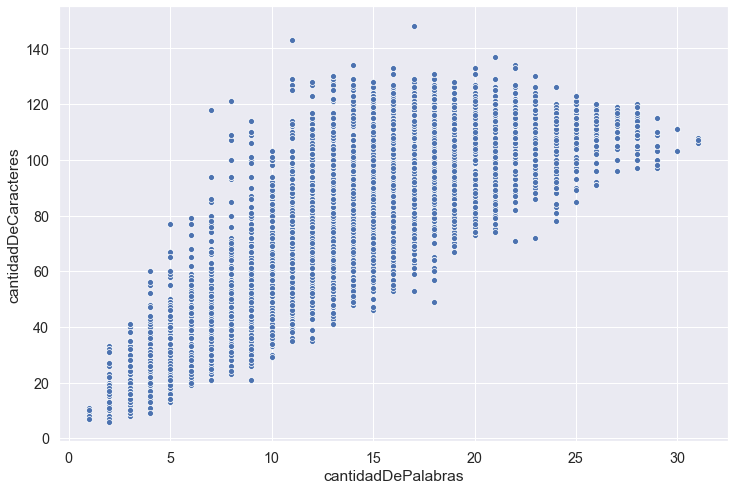

In [40]:
#Vamos a ver ahora si, en el caso de los ceros, hay variacion
eventsDataTarget0 = eventsDataAux[eventsDataAux['target']==0]
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax = sns.scatterplot(x="cantidadDePalabras", y="cantidadDeCaracteres", data=eventsDataTarget0)

In [41]:
eventsDataTarget0 = eventsDataTarget0.groupby("cantidadDePalabras").agg({'cantidadDeCaracteres':'mean'})
eventsDataTarget0 = eventsDataTarget0.reset_index()

In [42]:
#Realizo un join de ambos dataset. Como lo voy a utilizar para comparar, solo voy a quedarme con aquellas entradas que compartan
#cantidad de Palabras
eventsDataMix = eventsDataTarget0.set_index('cantidadDePalabras').join(eventsDataTarget1.set_index('cantidadDePalabras'),
                                                                    lsuffix = '_target_0',
                                                                    rsuffix = '_target_1',
                                                                    how='inner')

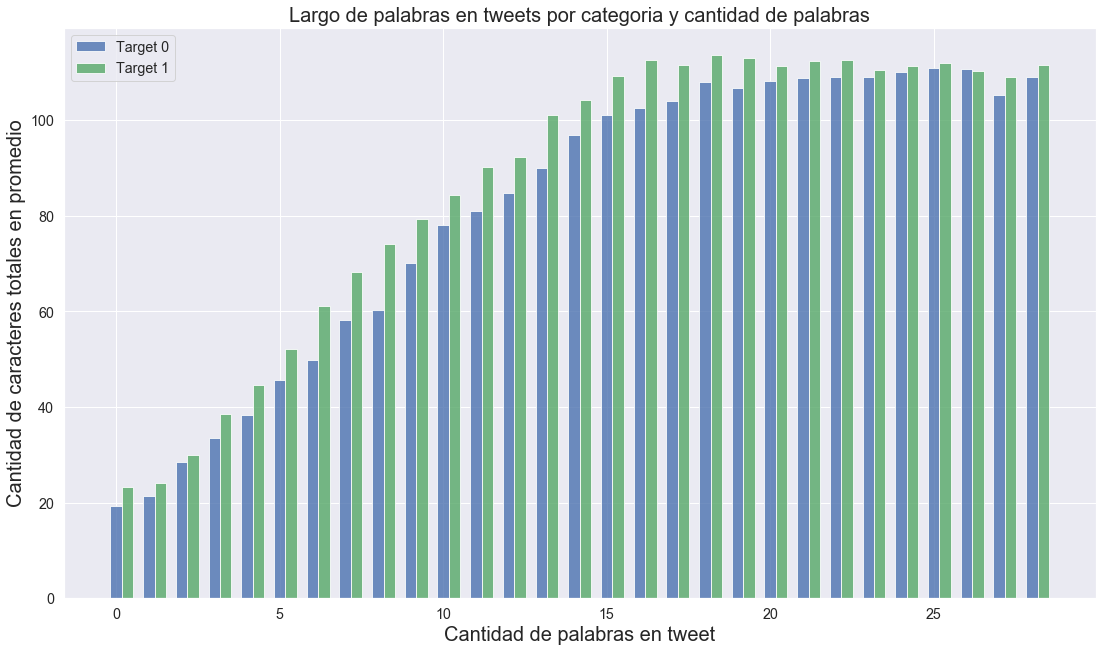

In [44]:
#Creo el grafico comparativo
target_0 = eventsDataMix['cantidadDeCaracteres_target_0']
target_1 = eventsDataMix['cantidadDeCaracteres_target_1']


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(len(eventsDataMix.index))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,
                 target_0,
                 bar_width,
                 alpha=opacity,
                 color='b',
                 label='Target 0')

rects2 = plt.bar(index + bar_width,
                 target_1,
                 bar_width,
                 alpha=opacity,
                 color='g',
                 label='Target 1')

plt.xlabel('Cantidad de palabras en tweet',size = 20)
plt.ylabel('Cantidad de caracteres totales en promedio',size = 20)
plt.title('Largo de palabras en tweets por categoria y cantidad de palabras', size = 20)
plt.legend()
plt.show()

Para que quede mas claro, se realizara un nuevo grafico en el que simplemente mostraremos la diferencia que existe

In [46]:
#Definicion de la funcion a aplicar para lograr el objetivo expresado anteriormente
def restar_columnas(row):
    return row['cantidadDeCaracteres_target_1']- row['cantidadDeCaracteres_target_0']


In [47]:
#Aplico la funcion y solo me quedo con el indice y la diferencia
eventsDataMix['diferencia_de_caracteres'] = eventsDataMix.apply(lambda x: restar_columnas(x),axis = 1)
eventsDataMix = eventsDataMix[['diferencia_de_caracteres']]

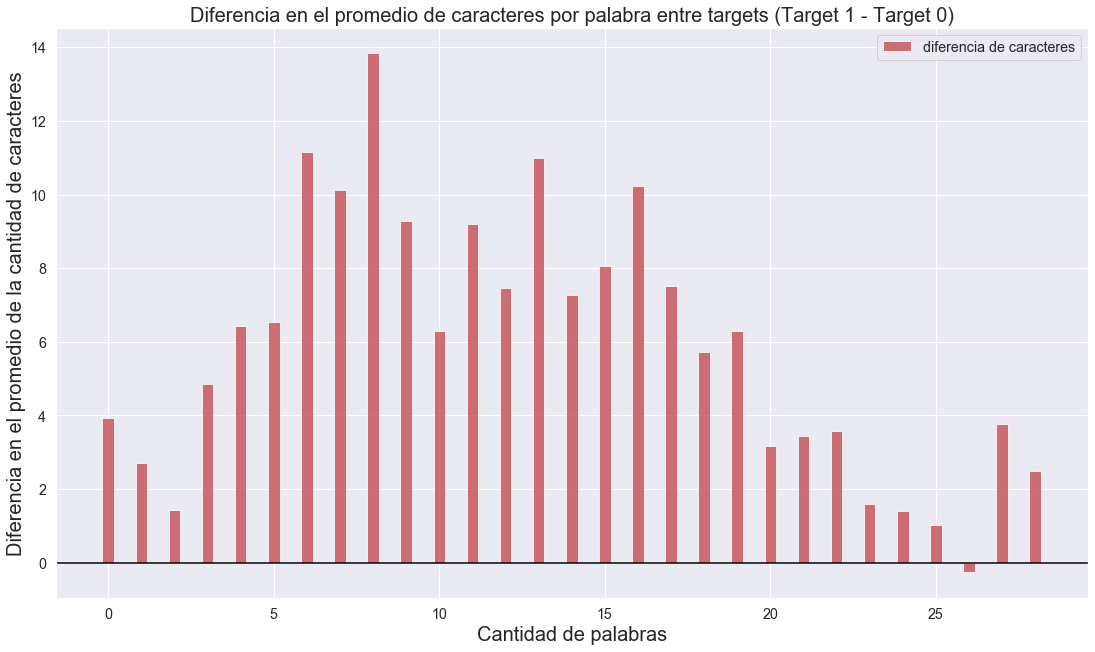

In [48]:
#Grafico en cuestion
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(len(eventsDataMix.index))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,
                 eventsDataMix['diferencia_de_caracteres'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='diferencia de caracteres')
plt.xlabel('Cantidad de palabras',size = 20)
plt.ylabel('Diferencia en el promedio de la cantidad de caracteres',size =20)
plt.title('Diferencia en el promedio de caracteres por palabra entre targets (Target 1 - Target 0)',size = 20)
plt.axhline(0, color='black')
plt.legend()
plt.show()

Vamos a trabajar con las keywords ahora

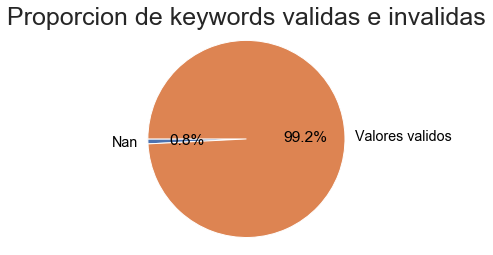

In [59]:
cantidadDeNan = len(eventsData[eventsData['keyword'].isna()])
cantidadDeKeywordValidas = len(eventsData[eventsData['keyword'].notna()])
labels = ['Nan','Valores validos']
percentages = [cantidadDeNan/(cantidadDeNan+cantidadDeKeywordValidas),cantidadDeKeywordValidas/(cantidadDeNan+cantidadDeKeywordValidas)]
fig1, ax1 = plt.subplots()
ax1.set_title('Proporcion de keywords validas e invalidas', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax1.pie(percentages, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=180,textprops=dict(color="black"))
ax1.axis('equal')
plt.show()


In [60]:
#Voy a analizar cuales son las keyword que tienen mayor tendencia a ser 1 y cero respectivamente. Top 5. Para no cometer
#nos vamos a quedar tambien con la cantidad de veces que aparecen y eliminar aquellos que tienen pocas apariciones
keywordData = eventsData[eventsData['keyword'].notna()]
keywordData = keywordData[['keyword','target']]
keywordData.loc[:, 'cantidad_de_apariciones'] = 1
keywordData = keywordData.groupby("keyword").agg({'target':'mean','cantidad_de_apariciones':'count'})
keywordData.sort_values('cantidad_de_apariciones',inplace = True)

[Text(0, 0.5, 'cantidad de apariciones')]

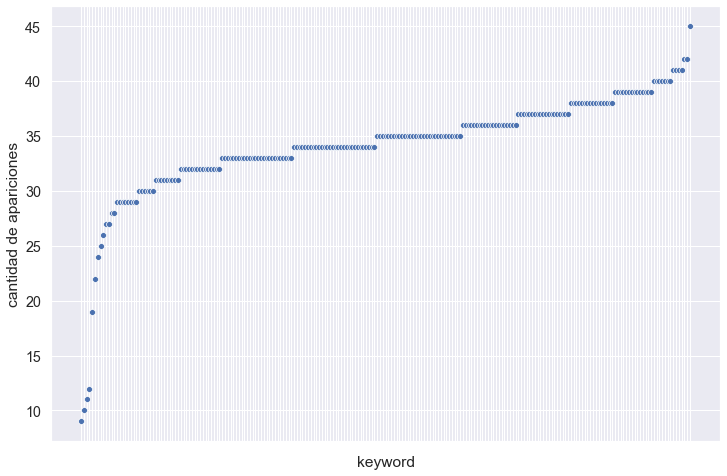

In [71]:
#Grafico de la distribucion de la cantidad de repeticiones de cada keyword
fig = plt.gcf()
fig.set_size_inches(12, 8)

ax = sns.scatterplot(x=keywordData.index, y="cantidad_de_apariciones", data=keywordData)
ax.set(xticklabels=[])
ax.set(ylabel="cantidad de apariciones")

In [368]:
keywordData

,target,cantidad_de_apariciones
keyword,,
radiation%20emergency,0.555556,9
inundation,0.200000,10
threat,0.181818,11
epicentre,0.083333,12
forest%20fire,0.789474,19
rescue,0.227273,22
war%20zone,0.291667,24
bush%20fires,0.720000,25
battle,0.192308,26


Se eliminaran aquellos que tienen apariciones menores a 29.

In [72]:
#Vamos a ver cuales son los 10 keywords con el peor y mejor promedio. Cuanto menor sea el promedio, mas target 0 tendran. Lo
#contrario rige para aquellos con promedio mayor.
keywordData = keywordData[keywordData['cantidad_de_apariciones']>25]
top_inferior_keywords = keywordData.nsmallest(10,'target')

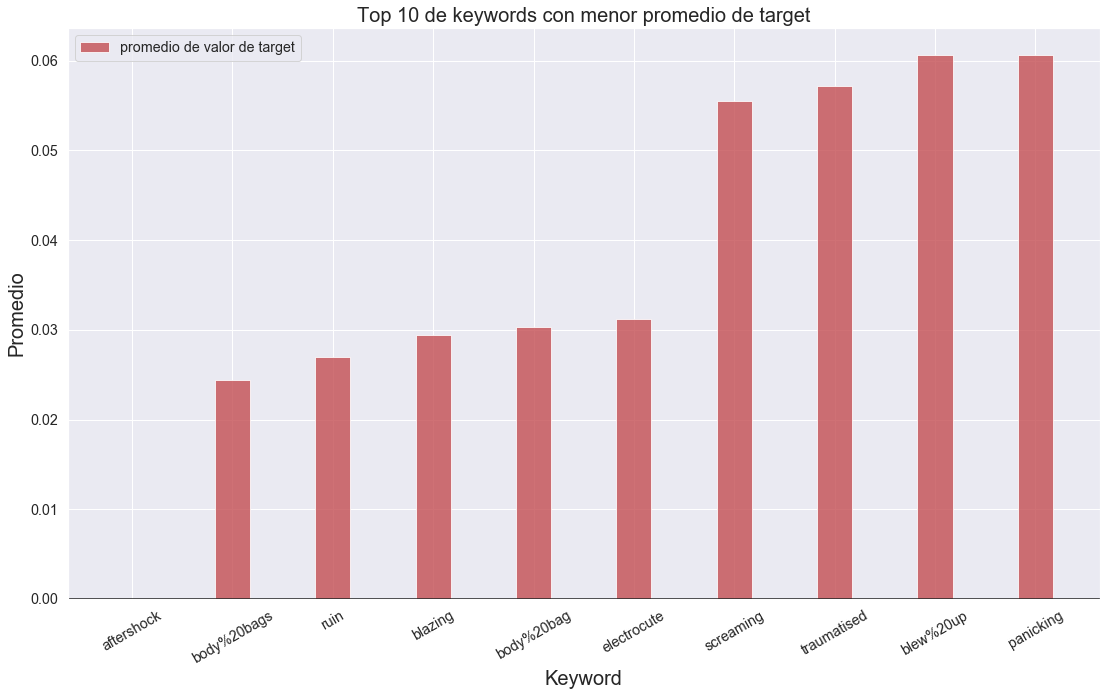

In [74]:
#Grafico del top 5
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(top_inferior_keywords.index,
                 top_inferior_keywords['target'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='promedio de valor de target')
plt.xlabel('Keyword',size = 20)
plt.ylabel('Promedio',size = 20)
plt.title('Top 10 de keywords con menor promedio de target',size = 20)
plt.axhline(0, color='black')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [84]:
#Ahora me quedo con aquellas que si tienen
top_superior = keywordData.nlargest(10,'target')
top_superior

,target,cantidad_de_apariciones
keyword,,
debris,1.000000,37
derailment,1.000000,39
wreckage,1.000000,39
outbreak,0.975000,40
oil%20spill,0.973684,38
typhoon,0.973684,38
suicide%20bombing,0.969697,33
suicide%20bomber,0.967742,31
bombing,0.931034,29


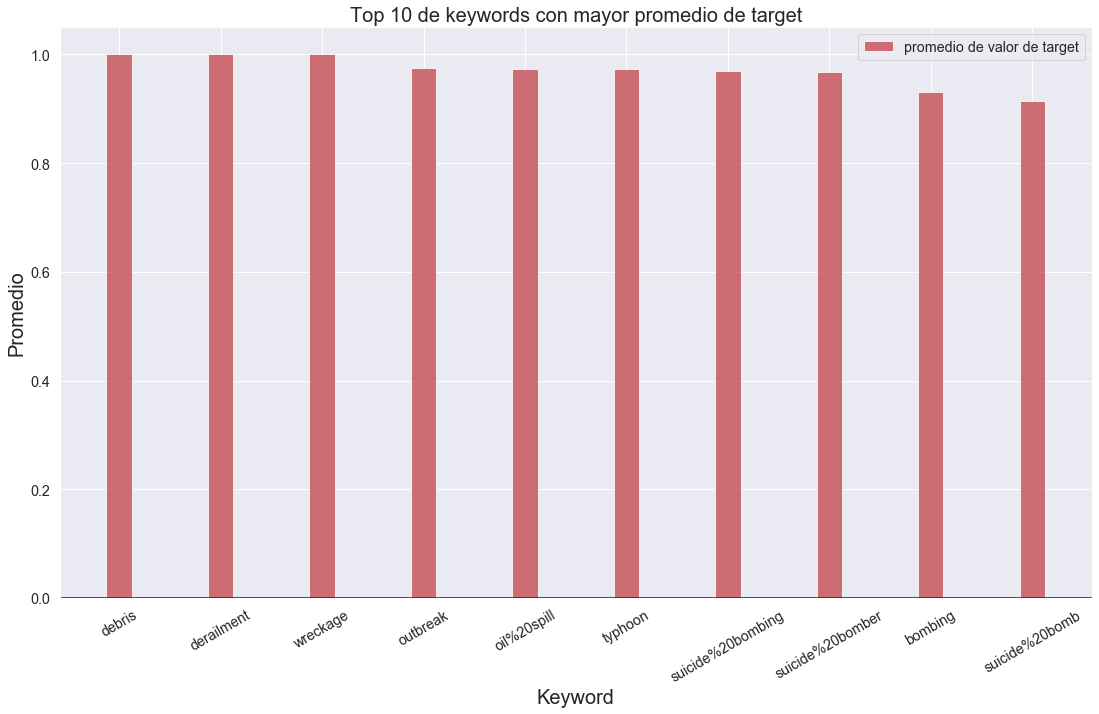

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(top_superior.index,
                 top_superior['target'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='promedio de valor de target')
plt.xlabel('Keyword',size = 20)
plt.ylabel('Promedio',size = 20)
plt.title('Top 10 de keywords con mayor promedio de target',size = 20)
plt.axhline(0, color='black')
plt.xticks(rotation=30)
plt.legend()
plt.show()

Ahora vamos a analizar la columna location

In [77]:
locationData = eventsData[eventsData['location'].notna()]

Un primer analisis seria agrupar por localizaciones y ver si hay lugares que se mencionan pocas veces, para luego tomar algunas
metricas interesantes

In [78]:
locationData = locationData[['location','target']]
locationData.loc[:, 'cantidad_de_apariciones'] = 1
locationData = locationData.groupby("location").agg({'target':'mean','cantidad_de_apariciones':'count'})
locationData.sort_values('cantidad_de_apariciones',inplace = True)
locationData

,target,cantidad_de_apariciones
location,,
,1.000000,1
"Redondo Beach, CA",1.000000,1
Regalo Island,0.000000,1
Republic of the Philippines,1.000000,1
Republica Dominicana,1.000000,1
"Reston, VA, USA",1.000000,1
Rheinbach / Germany,0.000000,1
Rhode Island,0.000000,1
RhodeIsland,0.000000,1


Arbitrariamente, voy a quedarme con aquellas entradas que tengan, por lo menos 10 apariciones

In [79]:
locationData = locationData[locationData['cantidad_de_apariciones']>=10]

Al igual que antes, vamos a quedarnos con aquellas localizaciones que tienden a ser 0 y 1 con mayor tendencia.

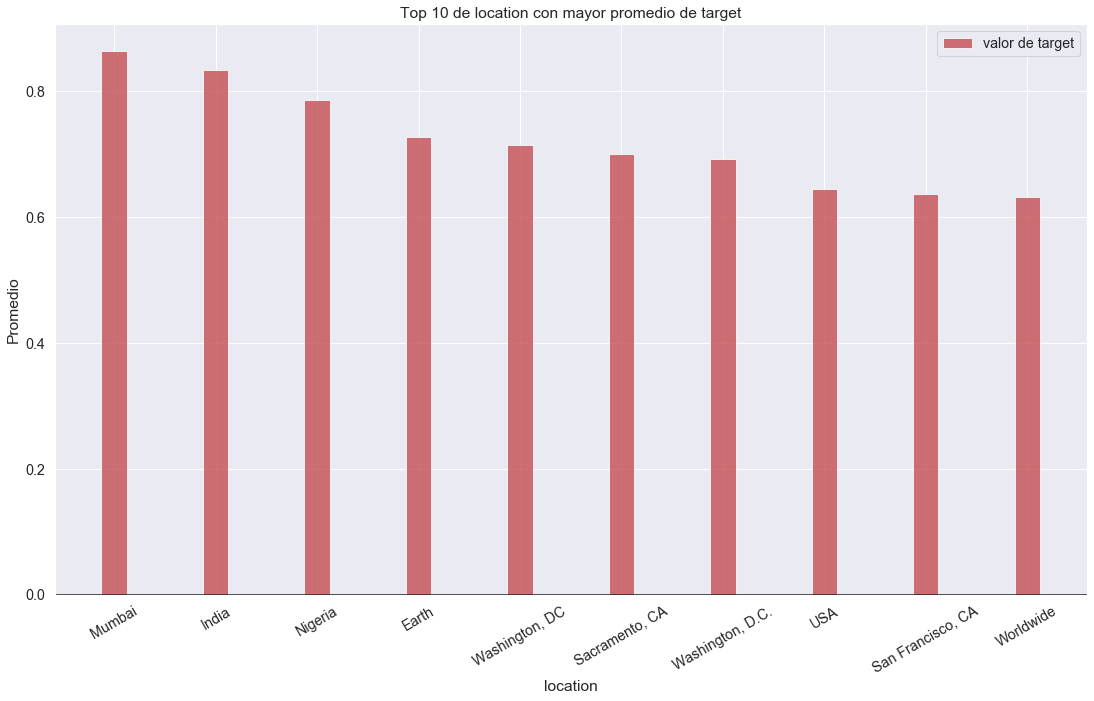

In [80]:
top_superior = locationData.nlargest(10,'target')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(top_superior.index,
                 top_superior['target'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='valor de target')

plt.xlabel('location')
plt.ylabel('Promedio')
plt.title('Top 10 de location con mayor promedio de target')
plt.axhline(0, color='black')
plt.xticks(rotation=30)
plt.legend()
plt.show()

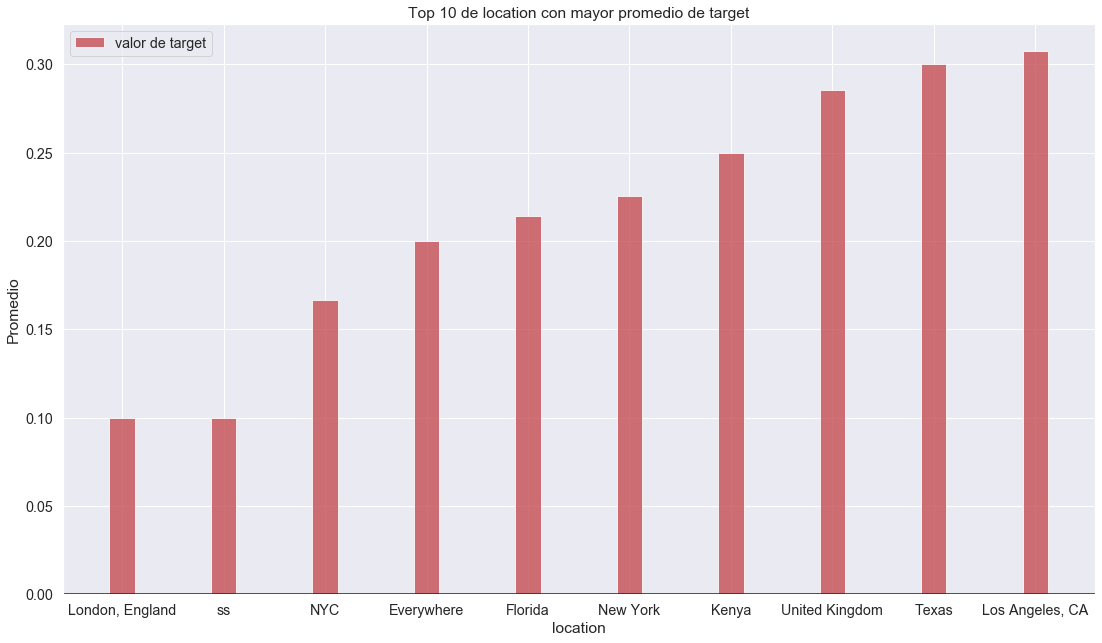

In [81]:
top_superior = locationData.nsmallest(10,'target')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(top_superior.index,
                 top_superior['target'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='valor de target')

plt.xlabel('location')
plt.ylabel('Promedio')
plt.title('Top 10 de location con mayor promedio de target')
plt.axhline(0, color='black')
plt.legend()
plt.show()

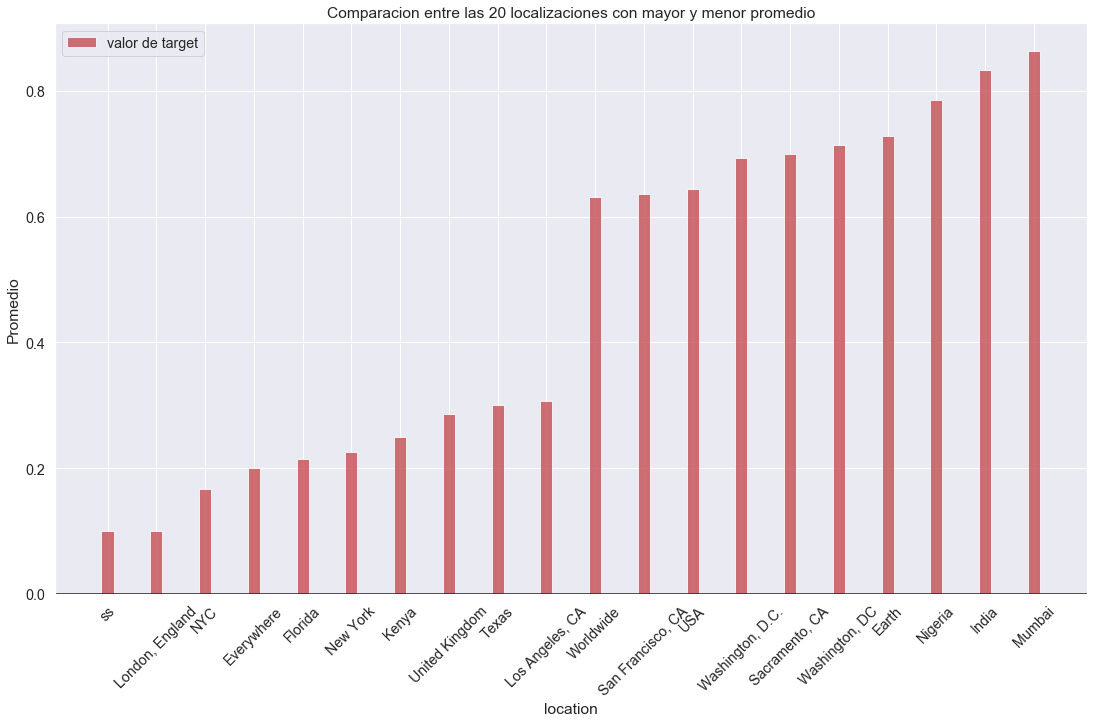

In [82]:
#Finalmente, un grafico entre las 20 localizaciones mas mentirosas y las 20 mas "verdaderas"
localizaciones = pd.concat([locationData.nlargest(10,'target'),locationData.nsmallest(10,'target')])
localizaciones.sort_values('target',inplace = True)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(localizaciones.index,
                 localizaciones['target'],
                 bar_width,
                 alpha=opacity,
                 color='r',
                 label='valor de target')

plt.xlabel('location')
plt.ylabel('Promedio')
plt.title('Comparacion entre las 20 localizaciones con mayor y menor promedio')
plt.axhline(0, color='black')
plt.xticks(rotation=45)
plt.legend()
plt.show()